Name: Galzote, Gilela Anne M.
Section: BSCS 4A

In [1]:
!pip install opencv-python-headless

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def display_images(img1, img2, title1="Image 1", title2="Image 2"):
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis('off')
    plt.show()

Saving 702ba40f-d3af-4664-84cd-6f7a20c7664a.jfif to 702ba40f-d3af-4664-84cd-6f7a20c7664a.jfif


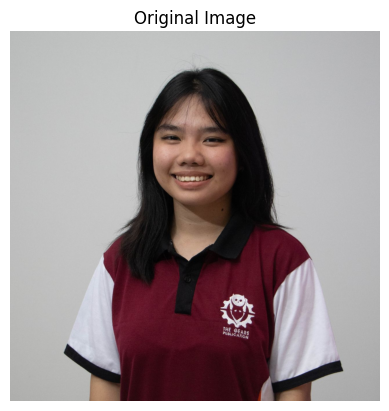

In [6]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()

image_path = next(iter(uploaded))
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

display_image(image, "Original Image")

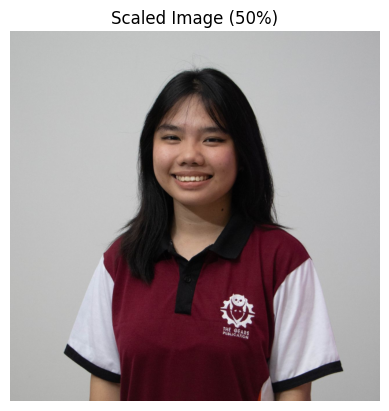

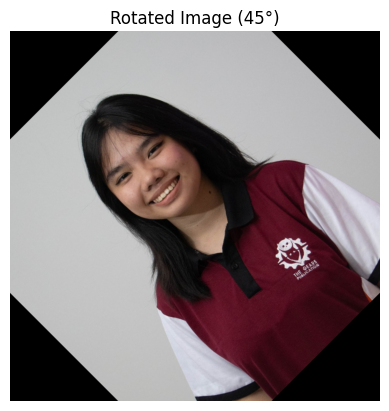

In [7]:
def scale_image(img, scale_factor):
    height, width = img.shape[:2]
    scaled_img = cv2.resize(img,
    (int(width * scale_factor), int(height * scale_factor)), interpolation=cv2.INTER_LINEAR)
    return scaled_img

def rotate_image(img, angle):
  height, width = img.shape[:2]
  center = (width // 2, height // 2)
  matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated_img = cv2.warpAffine(img, matrix, (width, height))
  return rotated_img

scaled_image = scale_image(image, 0.5)
display_image(scaled_image, "Scaled Image (50%)")

rotated_image = rotate_image(image, 45)
display_image(rotated_image, "Rotated Image (45°)")

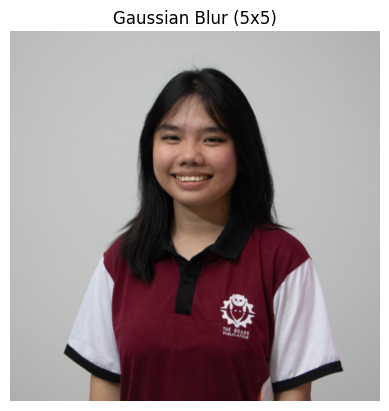

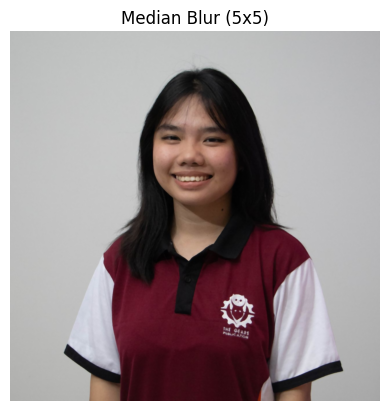

In [8]:
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
display_image(gaussian_blur, "Gaussian Blur (5x5)")

median_blur = cv2.medianBlur(image, 5)
display_image(median_blur, "Median Blur (5x5)")

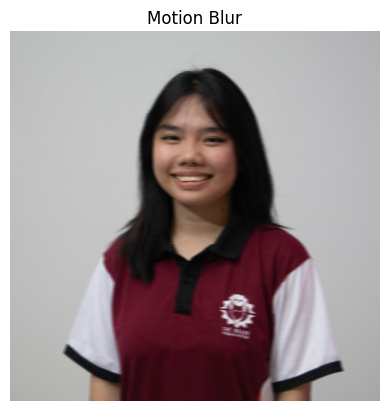

In [9]:
def motion_blur(img):
  kernel_size = 15
  kernel = np.zeros((kernel_size, kernel_size))
  kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
  kernel = kernel / kernel_size

  motion_blurred = cv2.filter2D(img, -1, kernel)
  return motion_blurred

motion_blurred = motion_blur(image)
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis('off')
plt.show()

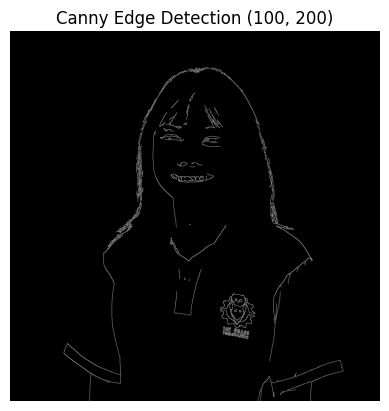

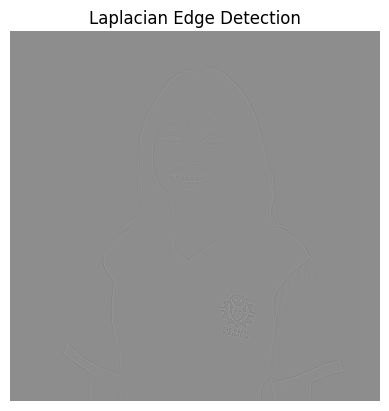

In [10]:
edges = cv2.Canny(image, 100, 200)
display_image(edges, "Canny Edge Detection (100, 200)")

def laplacian_edge_detection(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  laplacian = cv2.Laplacian(gray, cv2.CV_64F)
  return laplacian

laplacian_edges = laplacian_edge_detection(image)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')
plt.show()

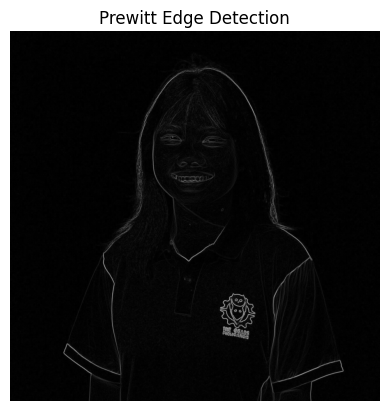

In [11]:
def prewitt_edge_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
    prewittx = cv2.filter2D(gray, cv2.CV_64F, kernelx)
    prewitty = cv2.filter2D(gray, cv2.CV_64F, kernely)
    prewitt_combined = cv2.magnitude(prewittx, prewitty)
    return prewitt_combined

prewitt_edges = prewitt_edge_detection(image)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')
plt.show()

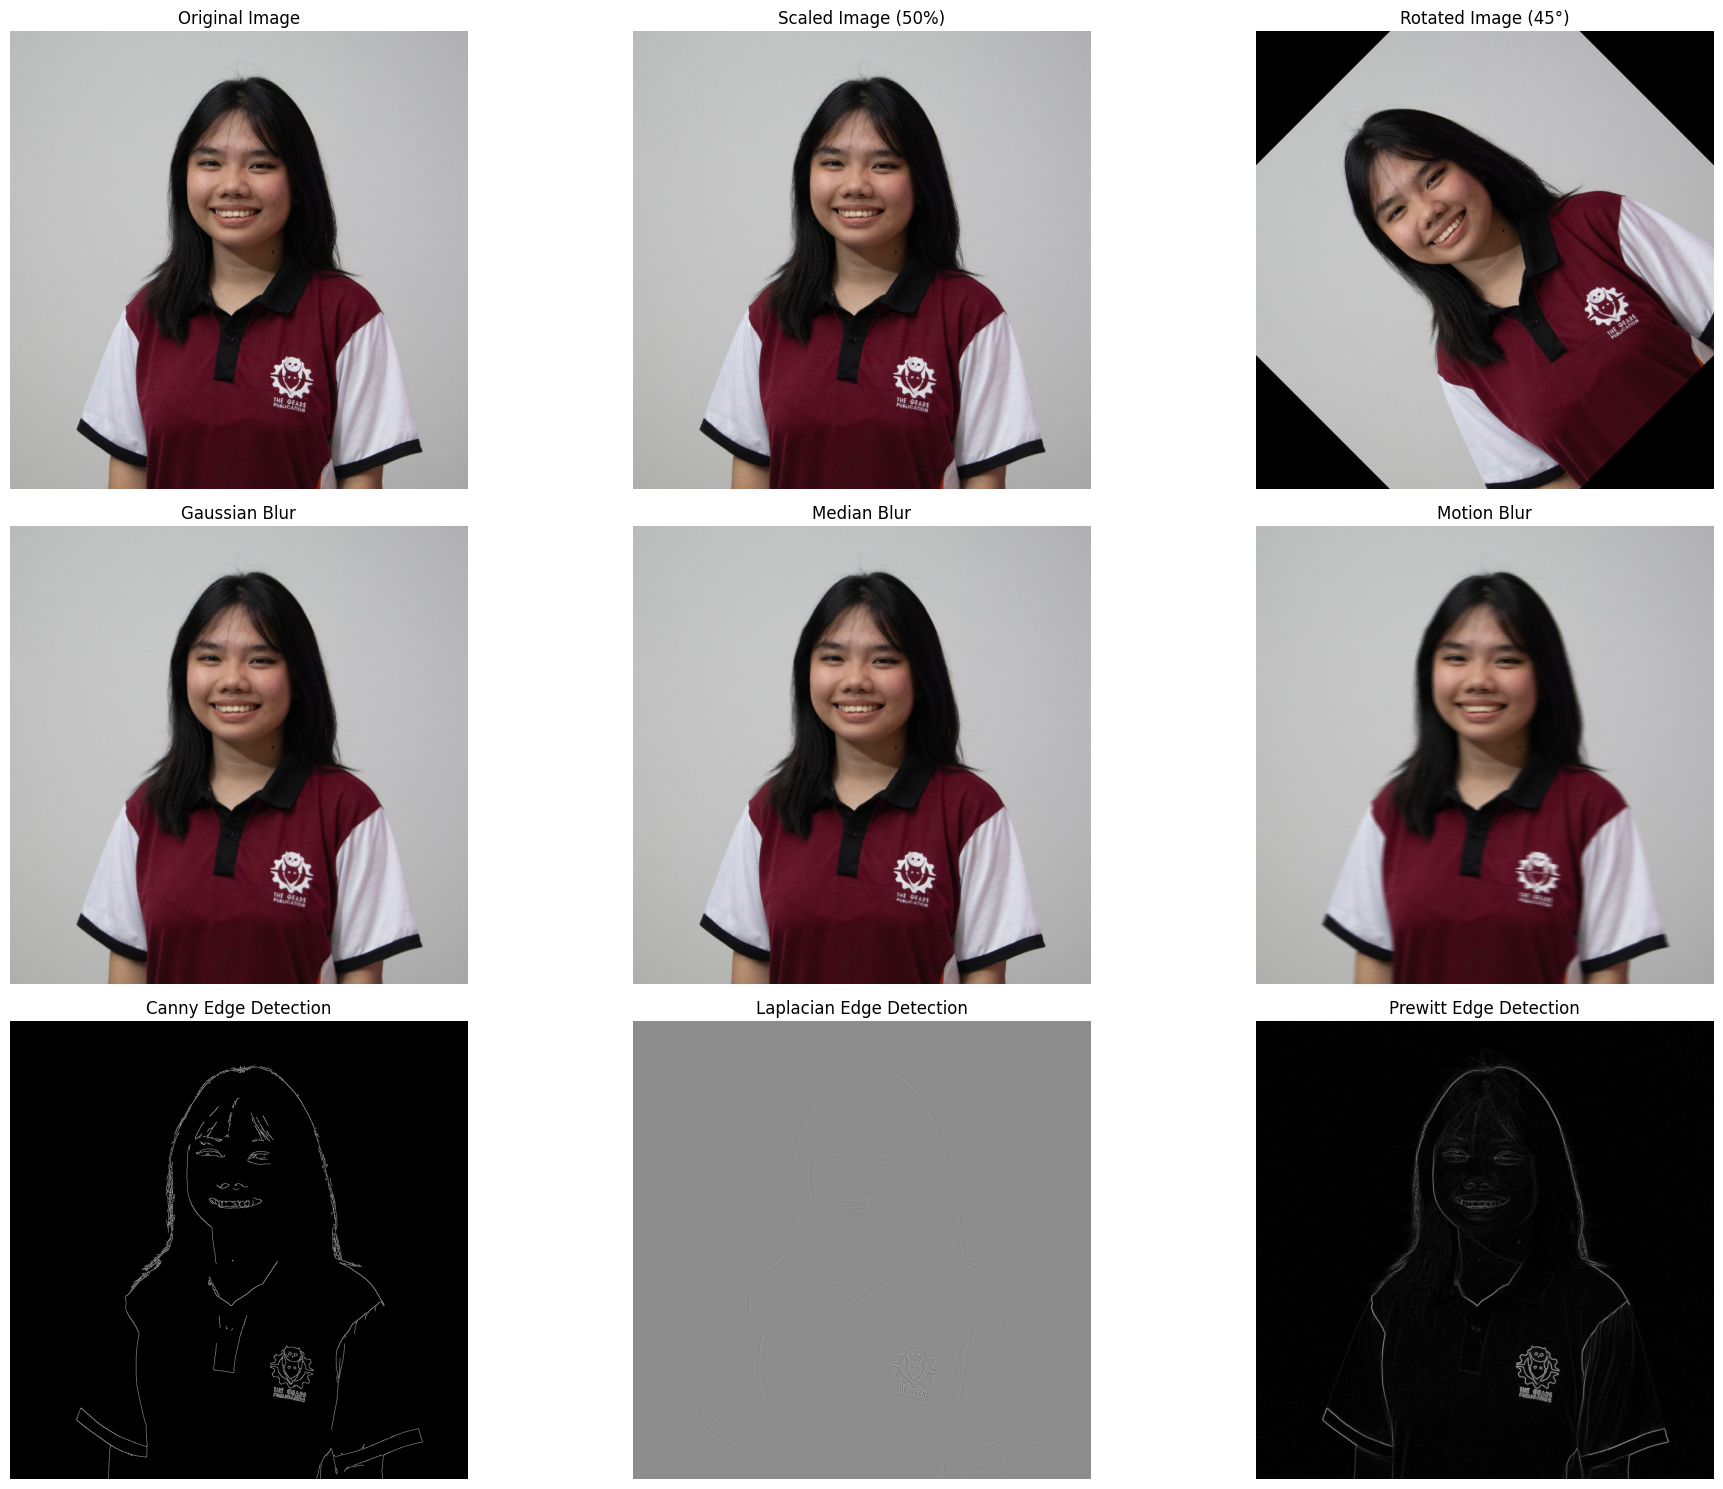

In [12]:
plt.figure(figsize=(20, 15))

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title("Scaled Image (50%)")
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image (45°)")
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()